# Titanic Survival Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing,tree,model_selection

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Impact of passenger class on his/her survival

<AxesSubplot:xlabel='Pclass'>

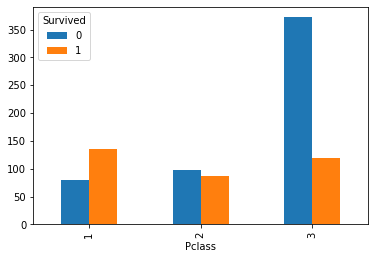

In [3]:
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')

As it is clearly visible that passenger class has a great effect on his/her survival, so this is a valuable feature

#### How many cabins are there

In [4]:
pd.unique(df.Cabin) #gives a array of unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [5]:
#From the above dataset we will be using Pclass,Fare,Sex,Age as feature for decision tree 

#### Deleting rows with null parameter and reindexing (Data Cleaning)

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### Predictor variable

In [7]:
target=df.Survived

#### Deleting unwanted columns from input data

In [8]:
df.drop(['Name','PassengerId','Survived','Cabin','Embarked','Ticket','SibSp','Parch'],axis='columns',inplace=True)

#### Encoding sex variable

In [9]:
le_sex=preprocessing.LabelEncoder()
#ML models take only numeric data

In [10]:
df['sex_n']=le_sex.fit_transform(df.Sex)
df.head()

,Pclass,Sex,Age,Fare,sex_n
0,1,female,38.0,71.2833,0
1,1,female,35.0,53.1000,0
2,1,male,54.0,51.8625,1
3,3,female,4.0,16.7000,0
4,1,female,58.0,26.5500,0


In [11]:
df.drop(['Sex'],axis='columns',inplace=True)

#### Train/Test data split of input

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df,target,test_size=0.2)

#### Creating model object

In [13]:
model=tree.DecisionTreeClassifier()

#### Trainaing Our model

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [16]:
model.score(X_test,y_test)

0.6756756756756757